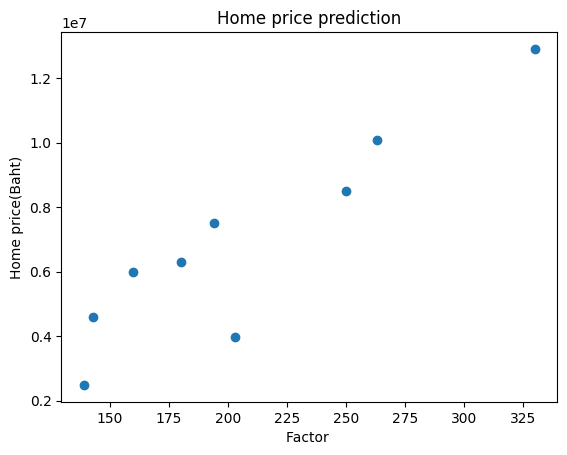

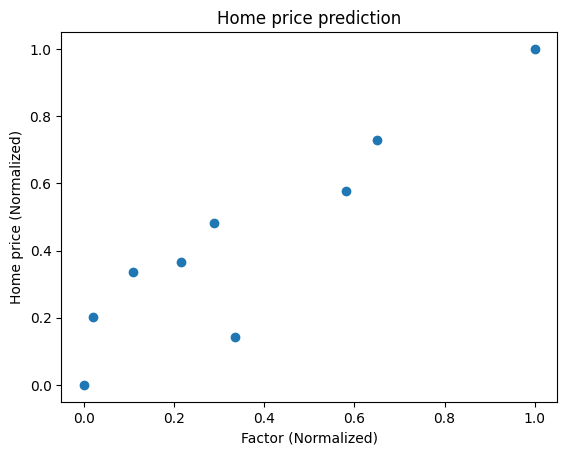

Epoch 1: Error = 160.515279, θ0 = 50.010364, θ1 = 23.743151, θ2 = 33.290096, θ3 = 28.759131, θ4 = 38.699214
Epoch 2: Error = 152.886564, θ0 = -50.792571, θ1 = -19.277429, θ2 = -30.741087, θ3 = -27.410878, θ4 = -39.472838
Epoch 3: Error = 145.674870, θ0 = 47.987566, θ1 = 22.456310, θ2 = 31.659319, θ3 = 27.421815, θ4 = 36.960740
Epoch 4: Error = 138.847438, θ0 = -48.327751, θ1 = -18.616696, θ2 = -29.490469, θ3 = -26.228226, θ4 = -37.706349
Epoch 5: Error = 132.375758, θ0 = 46.007497, θ1 = 21.267924, θ2 = 30.129358, θ3 = 26.154242, θ4 = 35.309644
Epoch 6: Error = 126.234810, θ0 = -46.015662, θ1 = -17.948895, θ2 = -28.271046, θ3 = -25.089722, θ4 = -36.010911
Epoch 7: Error = 120.402458, θ0 = 44.078533, θ1 = 20.165645, θ2 = 28.690012, θ3 = 24.951264, θ4 = 33.739182
Epoch 8: Error = 114.858970, θ0 = -43.840335, θ1 = -17.281438, θ2 = -27.086481, θ3 = -23.995192, θ4 = -34.385814
Epoch 9: Error = 109.586621, θ0 = 42.206492, θ1 = 19.139278, θ2 = 27.332718, θ3 = 23.808387, θ4 = 32.243593
Epoch 10

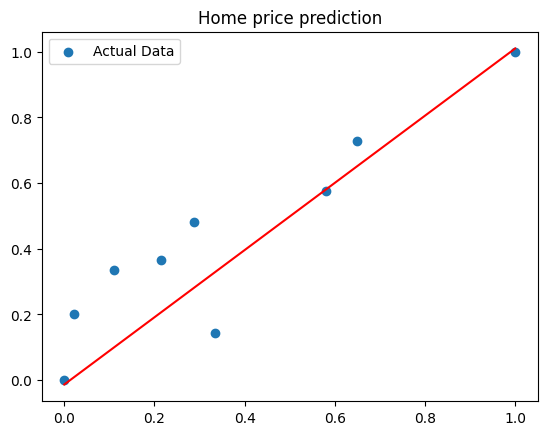


ตารางค่าที่ได้จากการคำนวณ:
      Epoch         x  x1_1      x2_1      x3_1         y  y_predict  \
0         1  0.000000  0.00  0.000000  0.000000  0.000000   2.000000   
1         1  0.335079  0.50  0.423529  0.080505  0.144092   5.350940   
2         1  0.020942  0.25  0.376471  0.665058  0.201729   3.501947   
3         1  0.109948  0.50  0.532941  0.922240  0.336215   4.810270   
4         1  0.214660  0.50  0.414118  0.804203  0.365034   5.096576   
...     ...       ...   ...       ...       ...       ...        ...   
5395    600  0.214660  0.50  0.414118  0.804203  0.365034   0.386748   
5396    600  0.287958  0.75  0.527059  0.980075  0.481268   0.471404   
5397    600  0.581152  0.50  1.000000  0.759525  0.577329   0.571059   
5398    600  0.649215  1.00  0.598824  0.962516  0.728146   0.711039   
5399    600  1.000000  1.00  0.635294  1.000000  1.000000   1.009993   

             SE        θ0        θ1        θ2        θ3        θ4  
0      2.000000 -2.750985  2.744401 -1.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set input
X = [139, 203, 143, 160, 180, 194, 250, 263, 330] #พื้นที่ใช้สอย ตารางเมตร
x1 = [4, 6, 5, 6, 6, 7, 6, 8, 8] #จำนวนห้อง
x2 = [18.7, 54.7, 50.7, 64, 53.9, 63.5, 103.7, 69.6, 72.7] #ขนาดที่ดิน ตารางวา
x3 = [17952, 19653, 32004, 37438, 34944, 38660, 34000, 38289, 39081] #ราคาต่อ ตร.ม.
Y = [2490000, 3990000, 4590000, 5990000, 6290000, 7500000, 8500000, 10070000, 12900000] #ราคาบ้าน

plt.scatter(X, Y)
plt.xlabel("Factor ")  # เพิ่มป้ายแกน x
plt.ylabel("Home price(Baht)")  # เพิ่มป้ายแกน y
plt.title("Home price prediction")
plt.show()

# Normalization
x_max, x_min = max(X), min(X)
x1_max, x1_min = max(x1), min(x1)
x2_max, x2_min = max(x2), min(x2)
x3_max, x3_min = max(x3), min(x3)
y_max, y_min = max(Y), min(Y)

x = np.array([(xi - x_min) / (x_max - x_min) for xi in X])
x1_1 = np.array([(x1i - x1_min) / (x1_max - x1_min) for x1i in x1])
x2_1 = np.array([(x2i - x2_min) / (x2_max - x2_min) for x2i in x2])
x3_1 = np.array([(x3i - x3_min) / (x3_max - x3_min) for x3i in x3])
y = np.array([(yi - y_min) / (y_max - y_min) for yi in Y])

plt.scatter(x, y)
plt.xlabel("Factor (Normalized)")  # เพิ่มป้ายแกน x
plt.ylabel("Home price (Normalized)")  # เพิ่มป้ายแกน y
plt.title("Home price prediction")
plt.show()

# Build a model
θ0, θ1, θ2, θ3, θ4 = 2.0, 5.0, 2.0, 1.5, 0.5
a = 0.095 # Learning rate
epochs = 600
results = []

for epoch in range(epochs):
    # คำนวณ y_predict
    y_predict = θ0 + (θ1 * x) + (θ2 * x1_1) + (θ3 * x2_1) + (θ4 * x3_1)

    # คำนวณค่าความคลาดเคลื่อน
    SE = 0.5 * (y - y_predict) ** 2
    SSE = sum(SE)

    # คำนวณค่าการเปลี่ยนแปลงของ θ
    D_θ0 = sum(-1 * (y - y_predict))
    D_θ1 = sum(-1 * x * (y - y_predict))
    D_θ2 = sum(-1 * x1_1 * (y - y_predict))
    D_θ3 = sum(-1 * x2_1 * (y - y_predict))
    D_θ4 = sum(-1 * x3_1 * (y - y_predict))

    # อัปเดตค่า θ
    θ0 -= a * D_θ0
    θ1 -= a * D_θ1
    θ2 -= a * D_θ2
    θ3 -= a * D_θ3
    θ4 -= a * D_θ4

    # บันทึกค่าที่ใช้แสดงผล
    for i in range(len(x)):
        results.append([epoch + 1, x[i], x1_1[i], x2_1[i], x3_1[i],y[i],y_predict[i], SE[i], θ0, θ1, θ2, θ3, θ4])

    print(f"Epoch {epoch+1}: Error = {SSE:.6f}, θ0 = {D_θ0:.6f}, θ1 = {D_θ1:.6f}, θ2 = {D_θ2:.6f}, θ3 = {D_θ3:.6f}, θ4 = {D_θ4:.6f}")

θ1_denorm = θ1 * (y_max - y_min) / (x_max - x_min)
θ2_denorm = θ2 * (y_max - y_min) / (x1_max - x1_min)
θ3_denorm = θ3 * (y_max - y_min) / (x2_max - x2_min)
θ4_denorm = θ4 * (y_max - y_min) / (x3_max - x3_min)
θ0_denorm = (θ0 * (y_max - y_min) + y_min) - (θ1_denorm * x_min) - (θ2_denorm * x1_min) - (θ3_denorm * x2_min) - (θ4_denorm * x3_min)

# Print final equation
print(f"สมการเส้นตรงที่ได้จาก Linear Regression:")
print(f"y = {θ0_denorm:.2f} + ({θ1_denorm:.2f} * x) + ({θ2_denorm:.2f} * x1) + ({θ3_denorm:.2f} * x2) + ({θ4_denorm:.2f} * x3)")

# พล็อตเส้น Linear Regression
plt.scatter(x, y, label="Actual Data")
#plt.plot(x, y_predict, color='red', label="Regression Line")
plt.title("Home price prediction")
plt.plot([min(x), max(x)], [min(y_predict), max(y_predict)], color='red')
plt.legend()
plt.show()

# Create DataFrame
df = pd.DataFrame(results, columns=["Epoch", "x", "x1_1", "x2_1", "x3_1","y", "y_predict", "SE", "θ0", "θ1", "θ2", "θ3", "θ4"])
# แสดงตารางผลลัพธ์
print("\nตารางค่าที่ได้จากการคำนวณ:")
print(df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set input
X = [139, 203, 143, 160, 180, 194, 250, 263, 330] #พื้นที่ใช้สอย ตารางเมตร
x1 = [4, 6, 5, 6, 6, 7, 6, 8, 8] #จำนวนห้อง
x2 = [18.7, 54.7, 50.7, 64, 53.9, 63.5, 103.7, 69.6, 72.7] #ขนาดที่ดิน ตารางวา
x3 = [17952, 19653, 32004, 37438, 34944, 38660, 34000, 38289, 39081] #ราคาต่อ ตร.ม.
Y = [2490000, 3990000, 4590000, 5990000, 6290000, 7500000, 8500000, 10070000, 12900000] #ราคาบ้าน

# Normalization
x_max, x_min = max(X), min(X)
x1_max, x1_min = max(x1), min(x1)
x2_max, x2_min = max(x2), min(x2)
x3_max, x3_min = max(x3), min(x3)
y_max, y_min = max(Y), min(Y)

x = np.array([(xi - x_min) / (x_max - x_min) for xi in X])
x1_1 = np.array([(x1i - x1_min) / (x1_max - x1_min) for x1i in x1])
x2_1 = np.array([(x2i - x2_min) / (x2_max - x2_min) for x2i in x2])
x3_1 = np.array([(x3i - x3_min) / (x3_max - x3_min) for x3i in x3])
y = np.array([(yi - y_min) / (y_max - y_min) for yi in Y])

# Build a model
θ0, θ1, θ2, θ3, θ4 = 2.0, 5.0, 2.0, 1.5, 0.5
a = 0.095 # Learning rate
epochs = 799
results = []

for epoch in range(epochs):
    y_predict = θ0 + (θ1 * x) + (θ2 * x1_1) + (θ3 * x2_1) + (θ4 * x3_1)
    SE = 0.5 * (y - y_predict) ** 2
    SSE = sum(SE)

    s_θ0 = (-1 * (y - y_predict))
    s_θ1 = (-1 * x * (y - y_predict))
    s_θ2 = (-1 * x1_1 * (y - y_predict))
    s_θ3 = (-1 * x2_1 * (y - y_predict))
    s_θ4 = (-1 * x3_1 * (y - y_predict))

    D_θ0 = sum(-1 * (y - y_predict))
    D_θ1 = sum(-1 * x * (y - y_predict))
    D_θ2 = sum(-1 * x1_1 * (y - y_predict))
    D_θ3 = sum(-1 * x2_1 * (y - y_predict))
    D_θ4 = sum(-1 * x3_1 * (y - y_predict))

    θ0 -= a * D_θ0
    θ1 -= a * D_θ1
    θ2 -= a * D_θ2
    θ3 -= a * D_θ3
    θ4 -= a * D_θ4

    if epoch == 0:
        for i in range(len(x)):
            results.append([epoch + 1, x[i], x1_1[i], x2_1[i], x3_1[i], y[i], y_predict[i], SE[i],s_θ0[i], s_θ1[i], s_θ2[i], s_θ3[i], s_θ4[i], θ0, θ1, θ2, θ3, θ4])
        print(f"Epoch {epoch+1}: Error = {SSE:.6f}, θ0 = {D_θ0:.6f}, θ1 = {D_θ1:.6f}, θ2 = {D_θ2:.6f}, θ3 = {D_θ3:.6f}, θ4 = {D_θ4:.6f}")

# Create DataFrame and display results of epoch 799
df = pd.DataFrame(results, columns=["Epoch", "x", "x1_1", "x2_1", "x3_1", "y", "y_predict", "SE", "s_θ0", "s_θ1", "s_θ2", "s_θ3", "s_θ4", "θ0", "θ1", "θ2", "θ3", "θ4"])
print("\nตารางค่าที่ได้จากการคำนวณ รอบที่ 799:")
print(df)

Epoch 1: Error = 160.515279, θ0 = 50.010364, θ1 = 23.743151, θ2 = 33.290096, θ3 = 28.759131, θ4 = 38.699214

ตารางค่าที่ได้จากการคำนวณ รอบที่ 799:
   Epoch         x  x1_1      x2_1      x3_1         y  y_predict         SE  \
0      1  0.000000  0.00  0.000000  0.000000  0.000000   2.000000   2.000000   
1      1  0.335079  0.50  0.423529  0.080505  0.144092   5.350940  13.555629   
2      1  0.020942  0.25  0.376471  0.665058  0.201729   3.501947   5.445718   
3      1  0.109948  0.50  0.532941  0.922240  0.336215   4.810270  10.008582   
4      1  0.214660  0.50  0.414118  0.804203  0.365034   5.096576  11.193748   
5      1  0.287958  0.75  0.527059  0.980075  0.481268   6.220416  16.468911   
6      1  0.581152  0.50  1.000000  0.759525  0.577329   7.785522  25.979017   
7      1  0.649215  1.00  0.598824  0.962516  0.728146   8.625567  31.184626   
8      1  1.000000  1.00  0.635294  1.000000  1.000000  10.452941  44.679048   

       s_θ0      s_θ1      s_θ2      s_θ3      s_θ4 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set input
X = [139, 203, 143, 160, 180, 194, 250, 263, 330] #พื้นที่ใช้สอย ตารางเมตร
x1 = [4, 6, 5, 6, 6, 7, 6, 8, 8] #จำนวนห้อง
x2 = [18.7, 54.7, 50.7, 64, 53.9, 63.5, 103.7, 69.6, 72.7] #ขนาดที่ดิน ตารางวา
x3 = [17952, 19653, 32004, 37438, 34944, 38660, 34000, 38289, 39081] #ราคาต่อ ตร.ม.
Y = [2490000, 3990000, 4590000, 5990000, 6290000, 7500000, 8500000, 10070000, 12900000] #ราคาบ้าน

# Normalization
x_max, x_min = max(X), min(X)
x1_max, x1_min = max(x1), min(x1)
x2_max, x2_min = max(x2), min(x2)
x3_max, x3_min = max(x3), min(x3)
y_max, y_min = max(Y), min(Y)

x = np.array([(xi - x_min) / (x_max - x_min) for xi in X])
x1_1 = np.array([(x1i - x1_min) / (x1_max - x1_min) for x1i in x1])
x2_1 = np.array([(x2i - x2_min) / (x2_max - x2_min) for x2i in x2])
x3_1 = np.array([(x3i - x3_min) / (x3_max - x3_min) for x3i in x3])
y = np.array([(yi - y_min) / (y_max - y_min) for yi in Y])

# Build a model
θ0, θ1, θ2, θ3, θ4 = 2.0, 5.0, 2.0, 1.5, 0.5
a = 0.095 # Learning rate
epochs = 800
results = []

for epoch in range(epochs):
    y_predict = θ0 + (θ1 * x) + (θ2 * x1_1) + (θ3 * x2_1) + (θ4 * x3_1)
    SE = 0.5 * (y - y_predict) ** 2
    SSE = sum(SE)

    s_θ0 = (-1 * (y - y_predict))
    s_θ1 = (-1 * x * (y - y_predict))
    s_θ2 = (-1 * x1_1 * (y - y_predict))
    s_θ3 = (-1 * x2_1 * (y - y_predict))
    s_θ4 = (-1 * x3_1 * (y - y_predict))

    D_θ0 = sum(-1 * (y - y_predict))
    D_θ1 = sum(-1 * x * (y - y_predict))
    D_θ2 = sum(-1 * x1_1 * (y - y_predict))
    D_θ3 = sum(-1 * x2_1 * (y - y_predict))
    D_θ4 = sum(-1 * x3_1 * (y - y_predict))

    θ0 -= a * D_θ0
    θ1 -= a * D_θ1
    θ2 -= a * D_θ2
    θ3 -= a * D_θ3
    θ4 -= a * D_θ4

    if epoch == 799:
        for i in range(len(x)):
            results.append([epoch + 1, x[i], x1_1[i], x2_1[i], x3_1[i], y[i], y_predict[i], SE[i],s_θ0[i], s_θ1[i], s_θ2[i], s_θ3[i], s_θ4[i], θ0, θ1, θ2, θ3, θ4])
        print(f"Epoch {epoch+1}: Error = {SSE:.6f}, θ0 = {D_θ0:.6f}, θ1 = {D_θ1:.6f}, θ2 = {D_θ2:.6f}, θ3 = {D_θ3:.6f}, θ4 = {D_θ4:.6f}")

# Create DataFrame and display results of epoch 799
df = pd.DataFrame(results, columns=["Epoch", "x", "x1_1", "x2_1", "x3_1", "y", "y_predict", "SE", "s_θ0", "s_θ1", "s_θ2", "s_θ3", "s_θ4", "θ0", "θ1", "θ2", "θ3", "θ4"])
print("\nตารางค่าที่ได้จากการคำนวณ รอบที่ 800:")
print(df)

Epoch 800: Error = 0.000658, θ0 = 0.000028, θ1 = 0.000159, θ2 = -0.000184, θ3 = -0.000091, θ4 = 0.000092

ตารางค่าที่ได้จากการคำนวณ รอบที่ 800:
   Epoch         x  x1_1      x2_1      x3_1         y  y_predict  \
0    800  0.000000  0.00  0.000000  0.000000  0.000000  -0.014668   
1    800  0.335079  0.50  0.423529  0.080505  0.144092   0.156068   
2    800  0.020942  0.25  0.376471  0.665058  0.201729   0.207165   
3    800  0.109948  0.50  0.532941  0.922240  0.336215   0.335458   
4    800  0.214660  0.50  0.414118  0.804203  0.365034   0.386491   
5    800  0.287958  0.75  0.527059  0.980075  0.481268   0.472240   
6    800  0.581152  0.50  1.000000  0.759525  0.577329   0.570773   
7    800  0.649215  1.00  0.598824  0.962516  0.728146   0.711751   
8    800  1.000000  1.00  0.635294  1.000000  1.000000   1.008562   

             SE      s_θ0      s_θ1      s_θ2      s_θ3      s_θ4        θ0  \
0  1.075744e-04 -0.014668 -0.000000 -0.000000 -0.000000 -0.000000 -0.014671   
1  7.17

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set input
X = np.array([139, 203, 143, 160, 180, 194, 250, 263, 330])
x1 = np.array([4, 6, 5, 6, 6, 7, 6, 8, 8])
x2 = np.array([18.7, 54.7, 50.7, 64, 53.9, 63.5, 103.7, 69.6, 72.7])
x3 = np.array([17952, 19653, 32004, 37438, 34944, 38660, 34000, 38289, 39081])
Y = np.array([2490000, 3990000, 4590000, 5990000, 6290000, 7500000, 8500000, 10070000, 12900000])

# Normalization
x = (X - X.min()) / (X.max() - X.min())
x1_1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2_1 = (x2 - x2.min()) / (x2.max() - x2.min())
x3_1 = (x3 - x3.min()) / (x3.max() - x3.min())
y = (Y - Y.min()) / (Y.max() - Y.min())

# Initialize parameters
θ0, θ1, θ2, θ3, θ4 = 2.0, 5.0, 2.0, 1.5, 0.5
a = 0.095 # Learning rate
epochs = 100 # เพิ่มรอบการฝึก

# สำหรับเก็บค่าของ θ และ y_predict ในแต่ละ epoch
history = []

for epoch in range(epochs):
    y_predict = θ0 + (θ1 * x) + (θ2 * x1_1) + (θ3 * x2_1) + (θ4 * x3_1)

    D_θ0 = sum(-1 * (y - y_predict))
    D_θ1 = sum(-1 * x * (y - y_predict))
    D_θ2 = sum(-1 * x1_1 * (y - y_predict))
    D_θ3 = sum(-1 * x2_1 * (y - y_predict))
    D_θ4 = sum(-1 * x3_1 * (y - y_predict))

    θ0 -= a * D_θ0
    θ1 -= a * D_θ1
    θ2 -= a * D_θ2
    θ3 -= a * D_θ3
    θ4 -= a * D_θ4

    history.append((epoch, y_predict.copy(), θ0, θ1, θ2, θ3, θ4))

# สร้าง Animation
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Factor (Normalized)")
ax.set_ylabel("Home price (Normalized)")
ax.set_title("Linear Regression Animation")
sc = ax.scatter(x, y, label="Actual Data")
line, = ax.plot([], [], color='red', label="Regression Line")
ax.legend()

def update(frame):
    epoch, y_pred, θ0, θ1, θ2, θ3, θ4 = history[frame]
    line.set_data([x.min(), x.max()], [y_pred.min(), y_pred.max()])
    ax.set_title(f"Epoch {epoch + 1}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(history), interval=200, blit=True)
HTML(ani.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.